In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer as tfidf
from sklearn.metrics.pairwise import linear_kernel
pd.options.mode.chained_assignment = None 

**Reading CSV File**

In [5]:
ratings=pd.read_csv('ratings_amazon.csv',header=None)

We see that we do not have got column names in our data , so for that we need to be in touch with the SME inorder to gain more information regarding the data

In [6]:
ratings.head()

,0,1,2,3
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


We were provided the names of the column in the site from which we downloaded the data.

In [ ]:
#Renaming columns
ratings.rename(columns={0:'Product_Code',1:'User_ID',2:'Ratings',3:'Timestamp'},inplace=True)

**Brief look of data**

In [8]:
ratings.head()

,Product_Code,User_ID,Ratings,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


**Shape of Data**

In [9]:
ratings.shape

(7824482, 4)

**Finding top k timestamps at which most products were reviewed**

In [22]:
g=ratings.groupby('Timestamp')['Product_Code'].count().reset_index()

In [25]:
top_10_timestamp=g.sort_values(by='Product_Code',ascending=False)[:10]

In [27]:
top_10_timestamp

,Timestamp,Product_Code
5291,1389052800,18276
5287,1388707200,17698
5194,1380672000,17649
4916,1356652800,16108
5284,1388448000,14377
5283,1388361600,14170
5286,1388620800,14155
4915,1356566400,13067
5472,1404691200,12841
5292,1389139200,12668


**Finding NaNs**

In [34]:
ratings.isna().sum()

Product_Code    0
User_ID         0
Ratings         0
Timestamp       0
dtype: int64

**Percentage of Unique Users**

In [35]:
perc_unique_users=(ratings.User_ID.nunique() * 100)/float(ratings.shape[0])

In [36]:
perc_unique_users

6.083495367488863

**Percentage of Unique Products**

In [37]:
perc_unique_product=(ratings.Product_Code.nunique() * 100)/float(ratings.shape[0])

In [38]:
perc_unique_product

53.699350321209764

**Drop Timestamp from Data**

In [39]:
ratings.drop('Timestamp',axis=1,inplace=True)

**Top 10 and Bottom 10 rated products**

In [40]:
products_grouped_ratings=ratings.groupby('Product_Code')['Ratings'].count().reset_index()

In [43]:
products_grouped_ratings=products_grouped_ratings.sort_values(by='Ratings',ascending=False)

In [44]:
top_10_rated_product=products_grouped_ratings[:10]

In [45]:
top_10_rated_product

,Product_Code,Ratings
3263531,A5JLAU2ARJ0BO,520
3512451,ADLVFFE4VBT8,501
2989526,A3OXHLG6DIBRW8,498
3291008,A6FIAB28IS79,431
3284634,A680RUE1FDO8B,406
755206,A1ODOGXEYECQQ8,380
2424036,A36K2N527TXXJN,314
1451394,A2AY4YUOX2N1BQ,311
4100926,AWPODHOB4GFWL,308
1277963,A25C2M3QF9G7OQ,296


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

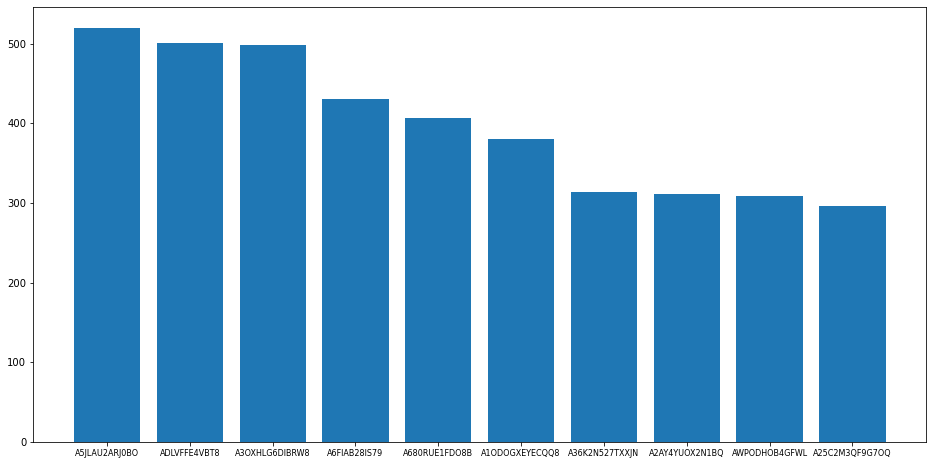

In [51]:
plt.figure(figsize=(16,8))
plt.bar(top_10_rated_product.Product_Code,top_10_rated_product.Ratings)
plt.xticks(fontsize=8)

In [52]:
bottom_10_rated_product=products_grouped_ratings.tail(10)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

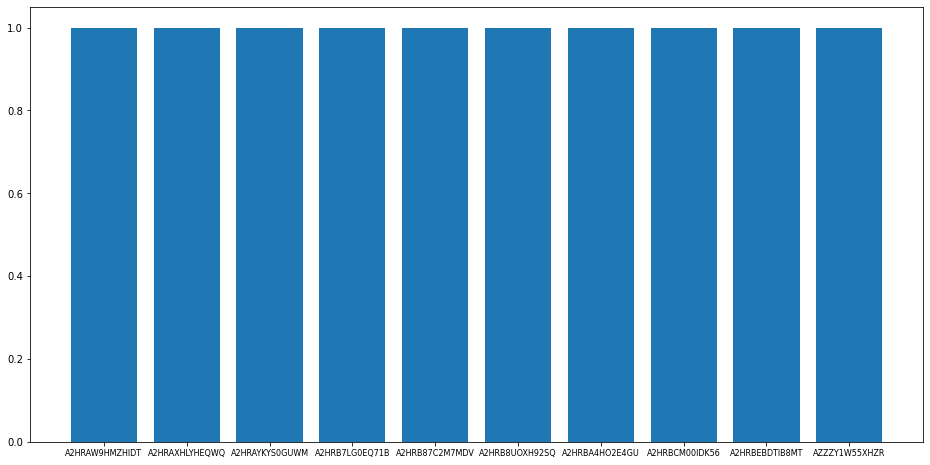

In [53]:
plt.figure(figsize=(16,8))
plt.bar(bottom_10_rated_product.Product_Code,bottom_10_rated_product.Ratings)
plt.xticks(fontsize=8)

**Top 10 and Bottom 10 Purchaser**

In [59]:
user_grouped_product=ratings.groupby('User_ID')['Product_Code'].count().reset_index()

In [60]:
user_grouped_product=user_grouped_product.sort_values(by='Product_Code',ascending=False)

In [62]:
top_10_purchaser=user_grouped_product.head(10)

In [63]:
bottom_10_purchaser=user_grouped_product.tail(10)

In [64]:
top_10_purchaser

,User_ID,Product_Code
308398,B0074BW614,18244
429572,B00DR0PDNE,16454
327308,B007WTAJTO,14172
102804,B0019EHU8G,12285
296625,B006GWO5WK,12226
178601,B003ELYQGG,11617
178813,B003ES5ZUU,10276
323013,B007R5YDYA,9907
289775,B00622AG6S,9823
30276,B0002L5R78,9487


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

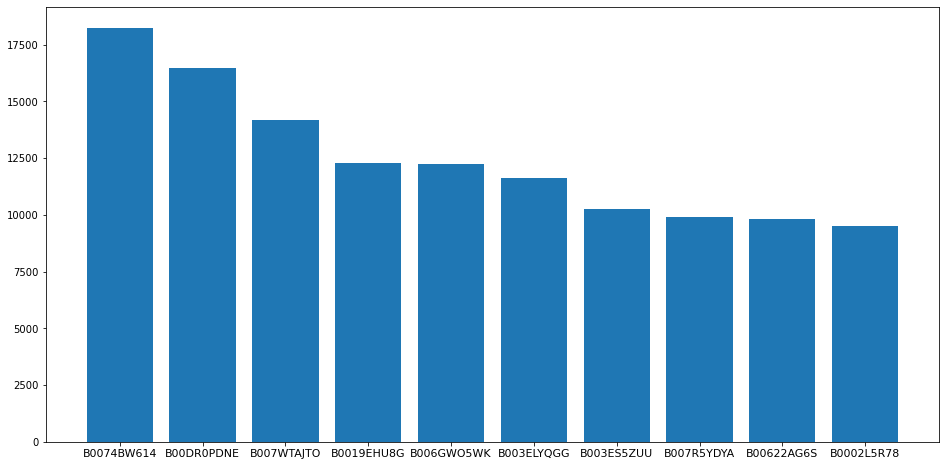

In [67]:
plt.figure(figsize=(16,8))
plt.bar(top_10_purchaser.User_ID,top_10_purchaser.Product_Code)
plt.xticks(fontsize=11)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

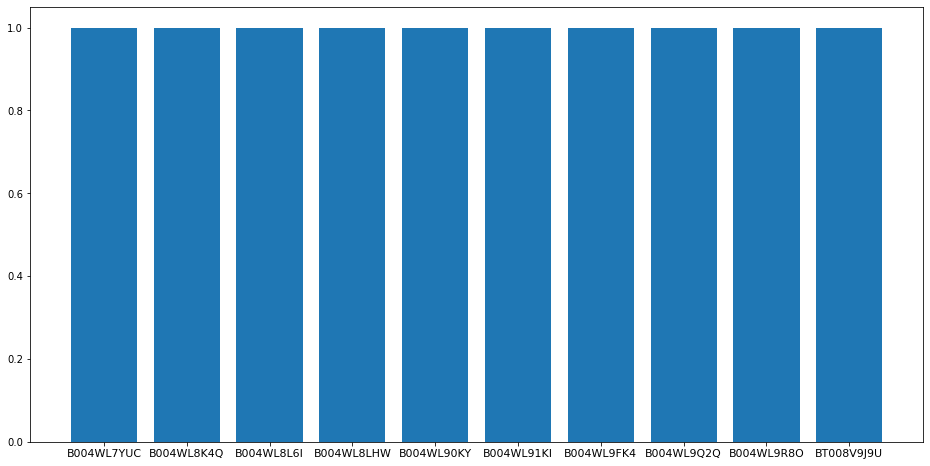

In [68]:
plt.figure(figsize=(16,8))
plt.bar(bottom_10_purchaser.User_ID,bottom_10_purchaser.Product_Code)
plt.xticks(fontsize=11)

**Ratings Frequency**

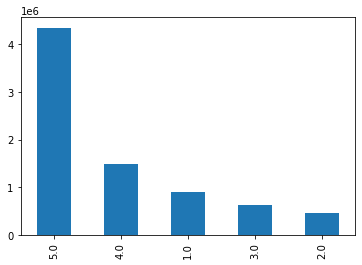

In [69]:
ratings.Ratings.value_counts().plot(kind='bar')

**Average Rating Recieved by Product**

In [83]:
mean_product_rating=ratings.groupby('Product_Code')['Ratings'].mean().reset_index()

In [87]:
mean_product_rating=mean_product_rating.sort_values(by='Ratings',ascending=False)

In [89]:
mean_product_rating.head(10)

,Product_Code,Ratings
0,A00000262KYZUE4J55XGL,5.0
1550792,A2E5Z0FJB6EQAX,5.0
3155246,A3UBAAG67M56ET,5.0
1550789,A2E5YU75N551K,5.0
3155247,A3UBAB0AZJQ41O,5.0
3155248,A3UBABSNYPHVLS,5.0
1550786,A2E5YQ26BVDMGJ,5.0
1550785,A2E5YN34J00OY0,5.0
3155249,A3UBACQC3GKPXM,5.0
1550782,A2E5YHLO38AT28,5.0


**Keeping records for only popular products and users , i.e products which are being rated / purchase more than 20 times and users who have rated/purchased more than 20 times**

In [90]:
product_count=ratings['Product_Code'].value_counts(ascending=False)

In [98]:
product_count[:10]

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
Name: Product_Code, dtype: int64

In [115]:
product=product_count.loc[product_count.values>20].index

In [116]:
Rating=ratings.loc[ratings.Product_Code.isin(product)]

In [118]:
user_count=ratings['User_ID'].value_counts(ascending=False)

In [123]:
pop_users=user_count.loc[user_count.values>20].index

In [125]:
ratings_upd=ratings.loc[(ratings.Product_Code.isin(product)) & (ratings.User_ID.isin(pop_users))]

In [126]:
ratings_upd.shape

(334978, 3)

**After subseting , Finding the frequencies of product code in each ratings**

In [127]:
grouped_by_ratings=ratings_upd.groupby('Ratings').agg({'Product_Code':'count'})
grouped_by_ratings['cum_sum']=grouped_by_ratings.Product_Code.cumsum()

In [128]:
grouped_by_ratings

,Product_Code,cum_sum
Ratings,,
1.0,16534,16534
2.0,14963,31497
3.0,30072,61569
4.0,76047,137616
5.0,197362,334978


**Splitting Data**

In [130]:
train,test=train_test_split(ratings_upd,test_size=.20,random_state=41)

**Popularity Based Recommender System**

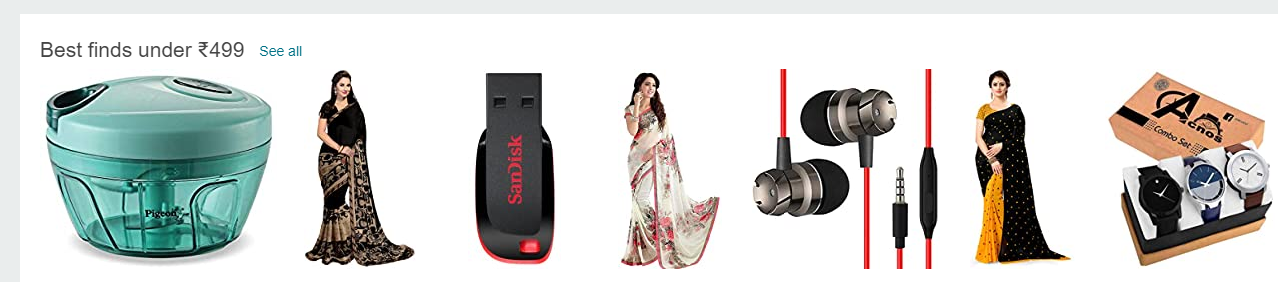

**Defining Class for Popularity Recommender**

In [143]:
class popularity_recommender():
    def __init__(self):
        self.train=None
        self.user_id_col_name=None
        self.item_id_col_name=None
        self.recommendation=None
    def fit(self,data,user_id_col_name,item_id_col_name):
        self.data=data
        self.user_id_col_name=user_id_col_name
        self.item_id_col_name=item_id_col_name
        data_gr=data.groupby([self.item_id_col_name]).agg({self.user_id_col_name:'count'}).reset_index()
        data_gr.rename(columns={self.user_id_col_name:'score'},inplace=True)
        data_gr=data_gr.sort_values(['score',self.item_id_col_name],ascending=[0,1])
        #Generate Recommendation as per Score
        data_gr['Rank']=data_gr['score'].rank(ascending=0,method='first')
        #Generate Top 10 recommendation
        self.recommendation=data_gr.head(10)
        #return data_gr
    def recommend(self,user_id):
        user_recommendation=self.recommendation
        user_recommendation['user_id']=user_id
        cols=user_recommendation.columns.tolist()
        cols=cols[-1:] + cols[:-1]
        user_recommendation=user_recommendation[cols]
        return user_recommendation
        
    
    

**Define Model Object**

In [144]:
rm=popularity_recommender()
rm.fit(train,'User_ID','Product_Code')
recom=rm.recommend('B002Y6CJJ8')

**Fit Model with Relevant Data**

In [146]:
rm.fit(train,'User_ID','Product_Code')

**Generate Recommendation for Particular User** 

- This user is not registered user , i.e user have not logged in the account , items are not being shown as per his behaviour or taste. It is just based on the popularity of any particular product 

In [147]:
recom=rm.recommend('B002Y6CJJ8')

In [148]:
recom

,user_id,Product_Code,score,Rank
10084,B002Y6CJJ8,ADLVFFE4VBT8,319,1.0
8606,B002Y6CJJ8,A3OXHLG6DIBRW8,303,2.0
9448,B002Y6CJJ8,A6FIAB28IS79,277,3.0
9372,B002Y6CJJ8,A5JLAU2ARJ0BO,267,4.0
9420,B002Y6CJJ8,A680RUE1FDO8B,256,5.0
2154,B002Y6CJJ8,A1ODOGXEYECQQ8,245,6.0
6988,B002Y6CJJ8,A36K2N527TXXJN,196,7.0
11302,B002Y6CJJ8,ARBKYIVNYWK3C,190,8.0
3495,B002Y6CJJ8,A23GFTVIETX7DS,185,9.0
3671,B002Y6CJJ8,A25C2M3QF9G7OQ,184,10.0


**Issue in recommendation by simple ranking is that it does not take popularity of product in consideration. For e.g  10000 products rated by users as 4.5, will be placed below the 100 products rated 5. This disparity is because probably 100 users can belong to a niche category. Hence we use weighted recommending formula.**

**WR= ((v/v+m) x R) + ((m/v+m) x C)**
    
        v->Number of Counts of Rating to Product
        m->Minimum number of rating count required for the product to be in recommendation
        R-> Mean Rating of Product
        C-> Mean Rating of all the Product in the dataset

**Popularity Recommender using Weighted Rating**

In [199]:
class popularity_recommender():
    def __init__(self):
        self.train=None
        self.user_id_col_name=None
        self.item_id_col_name=None
        self.recommendation=None
        self.Ratings_col_name=None
    
    def fit(self,data,user_id_col_name,item_id_col_name,Ratings_col_name):
        self.data=data
        self.user_id_col_name=user_id_col_name
        self.item_id_col_name=item_id_col_name
        self.Ratings_col_name=Ratings_col_name
        data_gr_count=data.groupby([self.item_id_col_name]).agg({self.Ratings_col_name:'count'}).reset_index()
        data_gr_mean=data.groupby([self.item_id_col_name]).agg({self.Ratings_col_name:'mean'}).reset_index()
        data_grouped=pd.DataFrame(data_gr_count.set_index(self.item_id_col_name).join(data_gr_mean.set_index(self.item_id_col_name),on=self.item_id_col_name,lsuffix='_count',rsuffix='_mean').reset_index())
        m=data_grouped.Ratings_count.quantile(.8)
        q_products=data_grouped[data_grouped.Ratings_count>=m]
        C=data_grouped.Ratings_mean.mean()
        def weighted_rating(x,m=m,C=C):
            v=x['Ratings_count']
            R=x['Ratings_mean']
            return ((v/(v+m))*R)+((m/(v+m))*C)
        q_products['Scores']=q_products.apply(weighted_rating,axis=1)
        q_products.sort_values('Scores',ascending=False)
        top_10_products=q_products.sort_values('Scores',ascending=False)[:10]
        self.recommendation = top_10_products
        #return self.recommender
        
        
    def recommend(self,user_id):
        user_recommendation=self.recommendation
        user_recommendation['user_id']=user_id
        cols=user_recommendation.columns.tolist()
        cols=cols[-1:] + cols[:-1]
        user_recommendation=user_recommendation[cols]
        return user_recommendation
        
    
    

**Creating , Fitting & Generate Recommendation**

In [202]:
rm=popularity_recommender()
rm.fit(train,'User_ID','Product_Code','Ratings')
recom=rm.recommend('B002Y6CJJ8')

In [203]:
recom

,user_id,Product_Code,Ratings_count,Ratings_mean,Scores
1240,B002Y6CJJ8,A1E1LEVQ9VQNK,121,4.892562,4.776134
9879,B002Y6CJJ8,ABDR6IJ93HFIO,102,4.911765,4.774170
66,B002Y6CJJ8,A10O7THJ2O20AG,55,5.000000,4.754487
7565,B002Y6CJJ8,A3D0UM4ZD2CMAW,56,4.982143,4.745396
4417,B002Y6CJJ8,A2DKQQIZ793AV5,47,5.000000,4.727945
3880,B002Y6CJJ8,A27M75LRSJ788H,74,4.891892,4.721464
2979,B002Y6CJJ8,A1XXMNLOLKNO0I,63,4.920635,4.720754
10724,B002Y6CJJ8,AKT8TGIT6VVZ5,63,4.920635,4.720754
3685,B002Y6CJJ8,A25FL6VLD7S23S,66,4.909091,4.719010
786,B002Y6CJJ8,A18U49406IPPIJ,50,4.960000,4.712570


**Item Similarity Based Recommender**
<img src="https://buomsoo-kim.github.io/data/images/2020-05-31/0.png">

**Defining Class for Item Similarity Recommender**

In [231]:
class item_similarity:
    def __init__(self):
        self.train=None
        self.user_id=None
        self.item_id=None
        self.item_similar=None
        self.cooccurence_matrix=None
        
    #Get unique item for given user
    def user_items(self,user):
        
        user_data=self.train[self.train[self.user_id]==user]
        user_items=user_data[self.item_id].unique().tolist()
        return user_items
    #Get unique users for a given item
    def items_user(self,item):
        
        item_data=self.train[self.train[self.item_id]==item]
        item_users=set(item_data[self.user_id].unique())
        return item_users
    #Get All unique items
    def get_all_items(self):
        all_items=self.train[self.item_id].unique().tolist()
        return all_items
    #Construct cooccurence matrix
    def construct_cooccurence_matrix(self,user_items,all_items):
        #Get users for all items in user_items.
        user_item_users=[]
        for i in range(0,len(user_items)):
            user_item_users.append(self.items_user(user_items[i]))
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_items), len(all_items))), float)
        #Calculate similarity between user items and all unique item
        for i in range(0,len(all_items)):
            items_i_data = self.train[self.train[self.item_id] == all_items[i]]
            users_i = set(items_i_data[self.user_id].unique())
            for j in range(0,len(user_items)):
                users_j = user_item_users[j]
                users_intersection = users_i.intersection(users_j)
                #Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    #Calculate union of listeners of songs i and j
                    users_union = users_i.union(users_j)
                    
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
                    
        
        return cooccurence_matrix
    def generate_top_recommendations(self, user, cooccurence_matrix, all_items, user_items):
        
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
        #Calculate a weighted average of the scores in cooccurence matrix for all user items.
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
 
        #Sort the indices of user_sim_scores based upon their value
        #Also maintain the corresponding score
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
        #Create a dataframe from the following
        columns = ['userId', 'itemId', 'score', 'rank']
        #index = np.arange(1) # array of numbers for the number of samples
        df = pd.DataFrame(columns=columns)
         
        #Fill the dataframe with top 10 item based recommendations
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_items[sort_index[i][1]] not in user_items and rank <= 10:
                df.loc[len(df)]=[user,all_items[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        #Handle the case where there are no recommendations
        if df.shape[0] == 0:
            print("The current user has no items for training the item similarity based recommendation model.")
            return -1
        else:
            return df
    def fit(self, train, user_id, item_id):
        self.train = train
        self.user_id = user_id
        self.item_id = item_id
    def recommend(self, user):
        ########################################
        #A. Get all unique items for this user
        ########################################
        user_items = self.user_items(user)    
            
        print("No. of unique items for the user: %d" % len(user_items))
        
        ######################################################
        #B. Get all unique items  in the training data
        ######################################################
        all_items = self.get_all_items()
        
        print("no. of unique items in the training set: %d" % len(all_items))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_items) X len(items)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_items, all_items)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_items, user_items)
                
        return df_recommendations
    
    #Get similar items to given items
    def get_similar_items(self, item_list):
        
        user_items = item_list
        
        ######################################################
        #B. Get all unique items  in the training data
        ######################################################
        all_items = self.get_all_items()
        
        print("no. of unique items in the training set: %d" % len(all_items))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_items, all_items)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        user = ""
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_items, user_items)
         
        return df_recommendations


            
    

**Creating Class Object**

In [232]:
irm=item_similarity()

**Fitting Class Object**

In [234]:
irm.fit(train,'User_ID','Product_Code')

**Unique User IDs**

In [235]:
users=train.User_ID.unique().tolist()

**Extracting User ID at index 5**

In [236]:
user_id=users[5]

**Getting unique item of the user id stored in users variable**

In [237]:
user_items=irm.user_items(user_id)

**Generating Recommendations**

In [238]:
for user_item in user_items:
    print(user_item)
print("--------------------------------------")
print('Recommendation Processing')
print("--------------------------------------")
irm.recommend(user_id)

A8MXBXTJYMDQG
A3MBTVX9FJQU2S
A37KG9AQK1PN10
A3KHCO3MJLKLVA
A2QSKVQU34BVIP
A2XZSVLQMMDJ89
A2HCJB4T29KEC3
AT28RL25Q2OLK
A1EKSETIBS9ETQ
A21BPMOV9NV2DJ
A36OOL5PM3Q3MG
AC6Z7DP1Z5GHD
A8Y03GM1T02GW
A2IRE3DBPFWW8Q
--------------------------------------
Recommendation Processing
--------------------------------------
No. of unique items for the user: 14
no. of unique items in the training set: 12006
Non zero values in cooccurence_matrix :11448


,userId,itemId,score,rank
0,B0014Z5XMK,A2RG6V2HH02U0M,0.024767,1
1,B0014Z5XMK,A17EFGL6NCKPKI,0.024364,2
2,B0014Z5XMK,A22EN4920L3F1E,0.019908,3
3,B0014Z5XMK,A150QS4IZB3XJ,0.018373,4
4,B0014Z5XMK,A1TUYFEAE1CH93,0.018365,5
5,B0014Z5XMK,A2G5M8JN4K3EWG,0.017754,6
6,B0014Z5XMK,AZFM7IM6ZEX2T,0.017291,7
7,B0014Z5XMK,A1G84JVGCWCUEJ,0.016647,8
8,B0014Z5XMK,AN9CP6J4JF91X,0.015425,9
9,B0014Z5XMK,A3SP5OZ25GTBIH,0.015018,10


**Content Based Recommender**
<img src="https://i.ytimg.com/vi/mM-zK_g34Rc/hqdefault.jpg">

**Reading JSON Data**

In [241]:
fashion=pd.read_json('tops_fashion.json')

**Brief view of data**

In [242]:
fashion.head()

,sku,asin,product_type_name,formatted_price,author,color,brand,publisher,availability,reviews,large_image_url,availability_type,small_image_url,editorial_review,title,model,medium_image_url,manufacturer,editorial_reivew
0,None,B016I2TS4W,SHIRT,None,None,None,FNC7C,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Minions Como Superheroes Ironman Women's O Nec...,Minions Como Superheroes Ironman Long Sleeve R...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
1,None,B01N49AI08,SHIRT,None,None,None,FIG Clothing,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Sizing runs on the small side. FIG® recommends...,FIG Clothing Womens Izo Tunic,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
2,None,B01JDPCOHO,SHIRT,None,None,None,FIG Clothing,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Sizing runs on the small side. FIG® recommends...,FIG Clothing Womens Won Top,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
3,None,B01N19U5H5,SHIRT,None,None,None,Focal18,None,None,"[True, https://www.amazon.com/reviews/iframe?a...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,100% Brand New & Fashion<br> Quantity: 1 Piece...,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
4,None,B004GSI2OS,SHIRT,$26.26,None,Onyx Black/ Stone,FeatherLite,None,Usually ships in 6-10 business days,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,,Featherlite Ladies' Long Sleeve Stain Resistan...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN


**Droping Unwanted Columns**

In [244]:
fashion_data=fashion.drop(['sku','formatted_price','author','publisher','availability','reviews','large_image_url','availability_type','small_image_url','model','medium_image_url','manufacturer','editorial_review'],axis=1)

In [245]:
fashion_data.head()

,asin,product_type_name,color,brand,title,editorial_reivew
0,B016I2TS4W,SHIRT,None,FNC7C,Minions Como Superheroes Ironman Long Sleeve R...,NaN
1,B01N49AI08,SHIRT,None,FIG Clothing,FIG Clothing Womens Izo Tunic,NaN
2,B01JDPCOHO,SHIRT,None,FIG Clothing,FIG Clothing Womens Won Top,NaN
3,B01N19U5H5,SHIRT,None,Focal18,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,NaN
4,B004GSI2OS,SHIRT,Onyx Black/ Stone,FeatherLite,Featherlite Ladies' Long Sleeve Stain Resistan...,NaN


**Checking for Data Types**

In [256]:
fashion_data.dtypes

asin                 object
product_type_name    object
color                object
brand                object
title                object
editorial_reivew     object
dtype: object

**Replacing NaNs**

In [262]:
fashion_data['color'].replace(np.NaN,'',inplace=True)

In [263]:
fashion_data.head()

,asin,product_type_name,color,brand,title,editorial_reivew
0,B016I2TS4W,SHIRT,,FNC7C,Minions Como Superheroes Ironman Long Sleeve R...,NaN
1,B01N49AI08,SHIRT,,FIG Clothing,FIG Clothing Womens Izo Tunic,NaN
2,B01JDPCOHO,SHIRT,,FIG Clothing,FIG Clothing Womens Won Top,NaN
3,B01N19U5H5,SHIRT,,Focal18,Focal18 Sailor Collar Bubble Sleeve Blouse Shi...,NaN
4,B004GSI2OS,SHIRT,Onyx Black/ Stone,FeatherLite,Featherlite Ladies' Long Sleeve Stain Resistan...,NaN


In [265]:
fashion_data.drop('editorial_reivew',axis=1,inplace=True)

In [274]:
fashion_data['brand'].replace(np.NaN,'',inplace=True)

**Feature Engineering New Column**

In [275]:
fashion_data['description']=fashion_data['brand']+' / '+fashion_data['color']+' / '+fashion_data['title']

**Limiting the size of data to 10,000 rows**

In [286]:
fashion_data_sub=fashion_data.head(10000)

**Creating TF-IDF Matrix**

In [292]:
tf=tfidf(analyzer='word',ngram_range=(1,5),min_df=0,stop_words='english')

In [293]:
tf_matrix=tf.fit_transform(fashion_data_sub['description'])

In [294]:
tf_matrix.shape

(10000, 192189)

**Generating Cosine Similarity**
<img src="https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/2b4a7a82-ad4c-4b2a-b808-e423a334de6f.png">

In [295]:
cosine_similarity=linear_kernel(tf_matrix,tf_matrix)

**Content Based Recommendation based on ASIN of Product**

In [322]:
prod_title=fashion_data_sub['asin']

**Storing Indices**

In [323]:
indices=pd.Series(fashion_data_sub.index,index=fashion_data_sub['asin'])

In [351]:
def recommend(title):
    idx=indices[title]
    sim_score=list(enumerate(cosine_similarity[idx]))
    sim_score=sorted(sim_score,key=lambda x : x[1],reverse=True)
    sim_score=sim_score[1:31]
    item_indices=[i[0] for i in sim_score]
    a = prod_title.iloc[item_indices]
    return a

In [354]:
a=recommend('B016I2TS4W')

In [359]:
ind=a.index.tolist()

In [361]:
fashion.iloc[ind,]

,sku,asin,product_type_name,formatted_price,author,color,brand,publisher,availability,reviews,large_image_url,availability_type,small_image_url,editorial_review,title,model,medium_image_url,manufacturer,editorial_reivew
1628,None,B017L9DP1I,SHIRT,None,None,None,FNC7C,None,None,"[True, https://www.amazon.com/reviews/iframe?a...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,Rio 2016 Olympic Games Women's O Neck Long Sle...,Rio 2016 Olympic Games Long Sleeve Round Neck ...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
8261,None,B074QN2GB7,SHIRT,None,None,None,Bangerdei,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,NaN,Bangerdei Women's Casual Cactus Print Long Sle...,None,https://images-na.ssl-images-amazon.com/images...,None,<p><strong>Note:</strong><br /> 1.As different...
2763,None,B01LS1H5JI,SHIRT,None,None,None,ApplesBottom,ApplesBottom,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,NaN,Women Long Sleeve Round Neck Plain Stretch T-S...,None,https://images-na.ssl-images-amazon.com/images...,ApplesBottom,Soft Stretch Comfortable Fabric Detail: Ladies...
24,None,B071FKC36P,SHIRT,None,None,None,Fifth Parallel Threads,None,None,"[True, https://www.amazon.com/reviews/iframe?a...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,<br><b>MEASUREMENTS</b><br><br><b>FPAWTTS025:<...,FPT Womens Basic Casual Short Sleeve Round Nec...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
2577,None,B01GHP2OB4,SHIRT,None,None,None,Firebo,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,"The comfortable, easy-to-wear, soft cotton mak...",Firebo Guns N Roses Appetite For Destruction S...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
2017,None,B017L9E1ZW,BOOKS_1973_AND_LATER,$9.49,None,Black,FNC7C,None,Usually ships in 1-2 business days,"[True, https://www.amazon.com/reviews/iframe?a...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,Rio 2016 Olympic Games Women's O Neck Long Sle...,Rio 2016 Olympic Games Long Sleeve Round Neck ...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
1557,None,B01G8JX472,SHIRT,None,None,None,Firebo,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,"The comfortable, easy-to-wear, soft cotton mak...",Firebo Bobby Darin The Bobby Darin Story Comfo...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
6693,None,B01NB7PSUF,DRESS,None,None,Black,AutumnFall,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,NaN,AutumnFall Womens Printed Long Sleeve Round Ne...,None,https://images-na.ssl-images-amazon.com/images...,None,Size Details:<BR><BR> Size:S----Bust:86cm/33.9...
1212,None,B0742Z552D,SHIRT,None,None,None,Fashion Story,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,"""Fashion Story"" is a trademarked and Amazon br...",Fashion Story Woman Long sleeve round neck Vel...,None,https://images-na.ssl-images-amazon.com/images...,None,NaN
4880,None,B074CKJJZC,SHIRT,None,None,White,ANDYICEE,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,NaN,Women's Long Sleeve Round Neck Pat